# Random Forest :
 
***Problem Statement :***
- A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
- Approach : A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  



**About the data :**

*Let’s consider a Company dataset with around 10 variables and 400 records.*
- The attributes are as follows: 
    - Sales : Unit sales (in thousands) at each location
    - Competitor Price : Price charged by competitor at each location
    - Income : Community income level (in thousands of dollars)
    - Advertising : Local advertising budget for company at each location (in thousands of dollars)
    - Population : Population size in region (in thousands)
    - Price : Price company charges for car seats at each site
    - Shelf Location at stores : A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
    - Age : Average age of the local population
    - Education : Education level at each location
    - Urban : A factor with levels No and Yes to indicate whether the store is in an urban or rural location
    - US : A factor with levels No and Yes to indicate whether the store is in the US or not


In [27]:
# Importing usefull libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import pydotplus
from sklearn import preprocessing, datasets, tree, externals
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import export_graphviz
from io import StringIO

# Ignoring anoying warnigs
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing dataset
df = pd.read_csv("Company_Data.csv")

# Showing first 5 rows from dataset
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
# Total rows & columns
df.shape

(400, 11)

In [5]:
# Looking for null values
df.isnull().any().any()

False

In [6]:
# Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
# Checking additional stats from dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [8]:
# Correlation between each column
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(4)

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.0000,0.0641,0.1520,0.2695,0.0505,-0.4450,-0.2318,-0.0520
CompPrice,0.0641,1.0000,-0.0807,-0.0242,-0.0947,0.5848,-0.1002,0.0252
Income,0.1520,-0.0807,1.0000,0.0590,-0.0079,-0.0567,-0.0047,-0.0569
Advertising,0.2695,-0.0242,0.0590,1.0000,0.2657,0.0445,-0.0046,-0.0336
Population,0.0505,-0.0947,-0.0079,0.2657,1.0000,-0.0121,-0.0427,-0.1064
Price,-0.4450,0.5848,-0.0567,0.0445,-0.0121,1.0000,-0.1022,0.0117
Age,-0.2318,-0.1002,-0.0047,-0.0046,-0.0427,-0.1022,1.0000,0.0065
Education,-0.0520,0.0252,-0.0569,-0.0336,-0.1064,0.0117,0.0065,1.0000


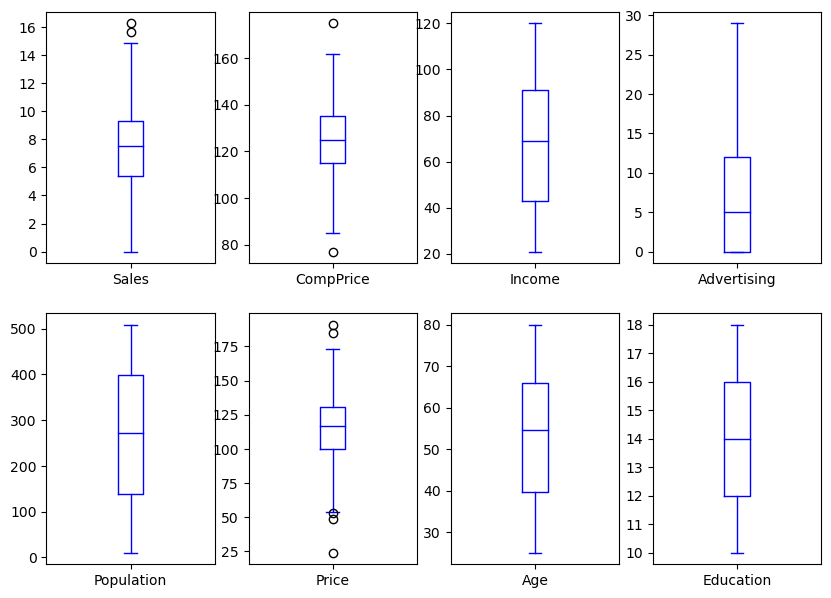

In [9]:
# To reinforce our insights about the data symmetry and their outliers, we can plot some boxplots

df.plot(kind='box', subplots=True, layout=(4,4),figsize=(10,15), sharex=False, sharey=False, color='blue')
plt.show()

In [10]:
# Skewness of dataset
df.skew()

Sales          0.185560
CompPrice     -0.042755
Income         0.049444
Advertising    0.639586
Population    -0.051227
Price         -0.125286
Age           -0.077182
Education      0.044007
dtype: float64

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


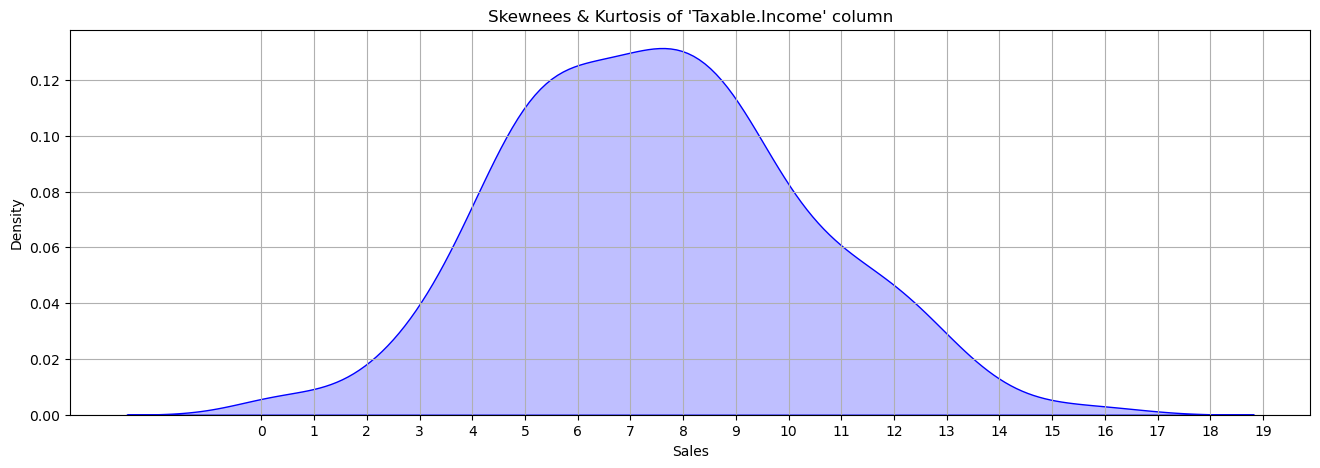

In [13]:
# Visualizing skewnees of "Sales" column
plt.figure(figsize=(16,5))
print("Skew: {}".format(df['Sales'].skew()))
print("Kurtosis: {}".format(df['Sales'].kurtosis()))
ax = sns.kdeplot(df['Sales'],shade=True,color='blue')
plt.xticks([i for i in range(0,20,1)])
plt.title("Skewnees & Kurtosis of 'Taxable.Income' column")
plt.grid()
plt.show()

***Ordinal Encoding :***
- Converting categorical columns into numerical columns

In [14]:
oe = OrdinalEncoder()

cat_cols = df.select_dtypes(object).columns
df[cat_cols] = oe.fit_transform(df[cat_cols])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0.0,42,17,1.0,1.0
1,11.22,111,48,16,260,83,1.0,65,10,1.0,1.0
2,10.06,113,35,10,269,80,2.0,59,12,1.0,1.0
3,7.40,117,100,4,466,97,2.0,55,14,1.0,1.0
4,4.15,141,64,3,340,128,0.0,38,13,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1.0,33,14,1.0,1.0
396,6.14,139,23,3,37,120,2.0,55,11,0.0,1.0
397,7.41,162,26,12,368,159,2.0,40,18,1.0,1.0
398,5.94,100,79,7,284,95,0.0,50,12,1.0,1.0


In [15]:
# Correlation
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(4)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.0000,0.0641,0.1520,0.2695,0.0505,-0.4450,0.1575,-0.2318,-0.0520,-0.0154,0.1771
CompPrice,0.0641,1.0000,-0.0807,-0.0242,-0.0947,0.5848,0.0233,-0.1002,0.0252,0.0666,0.0169
Income,0.1520,-0.0807,1.0000,0.0590,-0.0079,-0.0567,-0.0677,-0.0047,-0.0569,0.0380,0.0896
Advertising,0.2695,-0.0242,0.0590,1.0000,0.2657,0.0445,0.0085,-0.0046,-0.0336,0.0420,0.6845
Population,0.0505,-0.0947,-0.0079,0.2657,1.0000,-0.0121,-0.0448,-0.0427,-0.1064,-0.0520,0.0606
Price,-0.4450,0.5848,-0.0567,0.0445,-0.0121,1.0000,0.0146,-0.1022,0.0117,0.0470,0.0579
ShelveLoc,0.1575,0.0233,-0.0677,0.0085,-0.0448,0.0146,1.0000,0.0565,0.0015,-0.0640,-0.0398
Age,-0.2318,-0.1002,-0.0047,-0.0046,-0.0427,-0.1022,0.0565,1.0000,0.0065,0.0285,0.0087
Education,-0.0520,0.0252,-0.0569,-0.0336,-0.1064,0.0117,0.0015,0.0065,1.0000,-0.0331,-0.0783
Urban,-0.0154,0.0666,0.0380,0.0420,-0.0520,0.0470,-0.0640,0.0285,-0.0331,1.0000,0.0471


In [16]:
# Checking average of "Sales" column because its target column
df['Sales'].mean()

7.496325

# Random Forest :
- The target column is continious, so we create a class of the value based on the mean
    - Less than (<=) 7.49 : "Small"  
    - Greater than (>=) 7.49 : "large"

In [17]:
# Converting "Sales" column numerical to categorical
df["sales"]="small"
df.loc[df["Sales"]>7.49,"sales"]="large"
df.drop(["Sales"],axis=1,inplace=True)

In [18]:
# Unique values from "Sales" column
df['sales'].value_counts()

small    201
large    199
Name: sales, dtype: int64

In [20]:
# Creating independent & dependent variables
x = df.drop(columns=['sales'])
y = df['sales']

In [21]:
# Solitting dataset into train & test sets
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

print("Total rows & columns in train set :")
print("xtrain dataset : ", xtrain.shape)
print("ytrain dataset : ", ytrain.shape)

print("Total rows & columns in test set :")
print("xtest dataset : ", xtest.shape)
print("ytest dataset : ", ytest.shape)

Total rows & columns in train set :
xtrain dataset :  (320, 10)
ytrain dataset :  (320,)
Total rows & columns in test set :
xtest dataset :  (80, 10)
ytest dataset :  (80,)


In [22]:
ytrain.value_counts()

small    161
large    159
Name: sales, dtype: int64

***Model Building :***

In [23]:
model = RandomForestClassifier()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

print("Train Accuracy : ",model.score(xtrain,ytrain))
print("Test Accuracy : ",model.score(xtest,ytest))
print("Classification Report :")
print(classification_report(ytest,ypred))

Train Accuracy :  1.0
Test Accuracy :  0.8
Classification Report :
              precision    recall  f1-score   support

       large       0.80      0.80      0.80        40
       small       0.80      0.80      0.80        40

    accuracy                           0.80        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.80      0.80      0.80        80



In [24]:
# Training accuracy
pred_train = model.predict(xtrain)
print("Train Accuracy :",accuracy_score(ytrain,pred_train))
confusion_matrix(ytrain,pred_train)

Train Accuracy : 1.0


array([[159,   0],
       [  0, 161]], dtype=int64)

In [25]:
# Testing accuracy
pred_test = model.predict(xtest)
print("Test Accuracy :",accuracy_score(ytest,pred_test))
confusion_matrix(ytest,pred_test)

Test Accuracy : 0.8


array([[32,  8],
       [ 8, 32]], dtype=int64)

In [30]:
# Creating dataframe for actual & predicted values
df_t=pd.DataFrame({'Actual':ytest, 'Predicted':pred_test})
df_t

,Actual,Predicted
398,small,small
125,large,large
328,small,small
339,large,large
172,large,large
...,...,...
347,small,large
41,large,small
180,small,small
132,large,small


In [31]:
# Creating list of columns
cols = list(df.columns)
cols

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US',
 'sales']

In [23]:
predict = cols[0:10]
target = cols[10]

In [24]:
tree1 = model.estimators_[20]
tree1

DecisionTreeClassifier(max_features='auto', random_state=1646786188)

In [25]:
dot_data = StringIO()

export_graphviz(tree1, out_file=dot_data, feature_names=predict, class_names=target,
                filled=True, rounded=True, impurity=False, proportion=False, precision=2)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [26]:
graph.write_png('company_full.png')

True

In [27]:
rf_small = RandomForestClassifier(n_estimators=10,max_depth=3)
rf_small.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [28]:
tree_small = rf_small.estimators_[5]
export_graphviz(tree_small, out_file=dot_data, feature_names=predict, rounded=True, precision=1)
graph_small = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [29]:
graph.write_png('company_small.png')

True

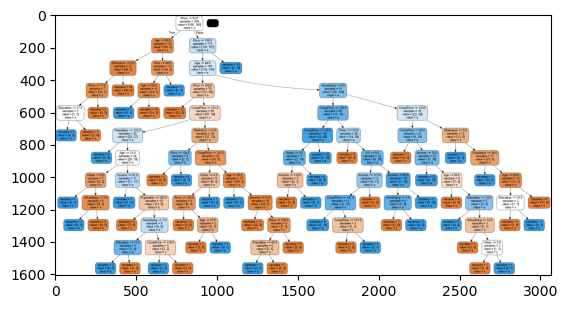

In [30]:
img = mpimg.imread('company_small.png') 
plt.imshow(img)

In [31]:
model.feature_importances_

array([0.112151  , 0.10411183, 0.10991756, 0.08882624, 0.25362574,
       0.11348074, 0.13471253, 0.05060688, 0.01397535, 0.01859213])

In [32]:
feature_importance = pd.DataFrame({'feature': list(xtrain.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
feature_importance

,feature,importance
4,Price,0.253626
6,Age,0.134713
5,ShelveLoc,0.113481
0,CompPrice,0.112151
2,Advertising,0.109918
1,Income,0.104112
3,Population,0.088826
7,Education,0.050607
9,US,0.018592
8,Urban,0.013975


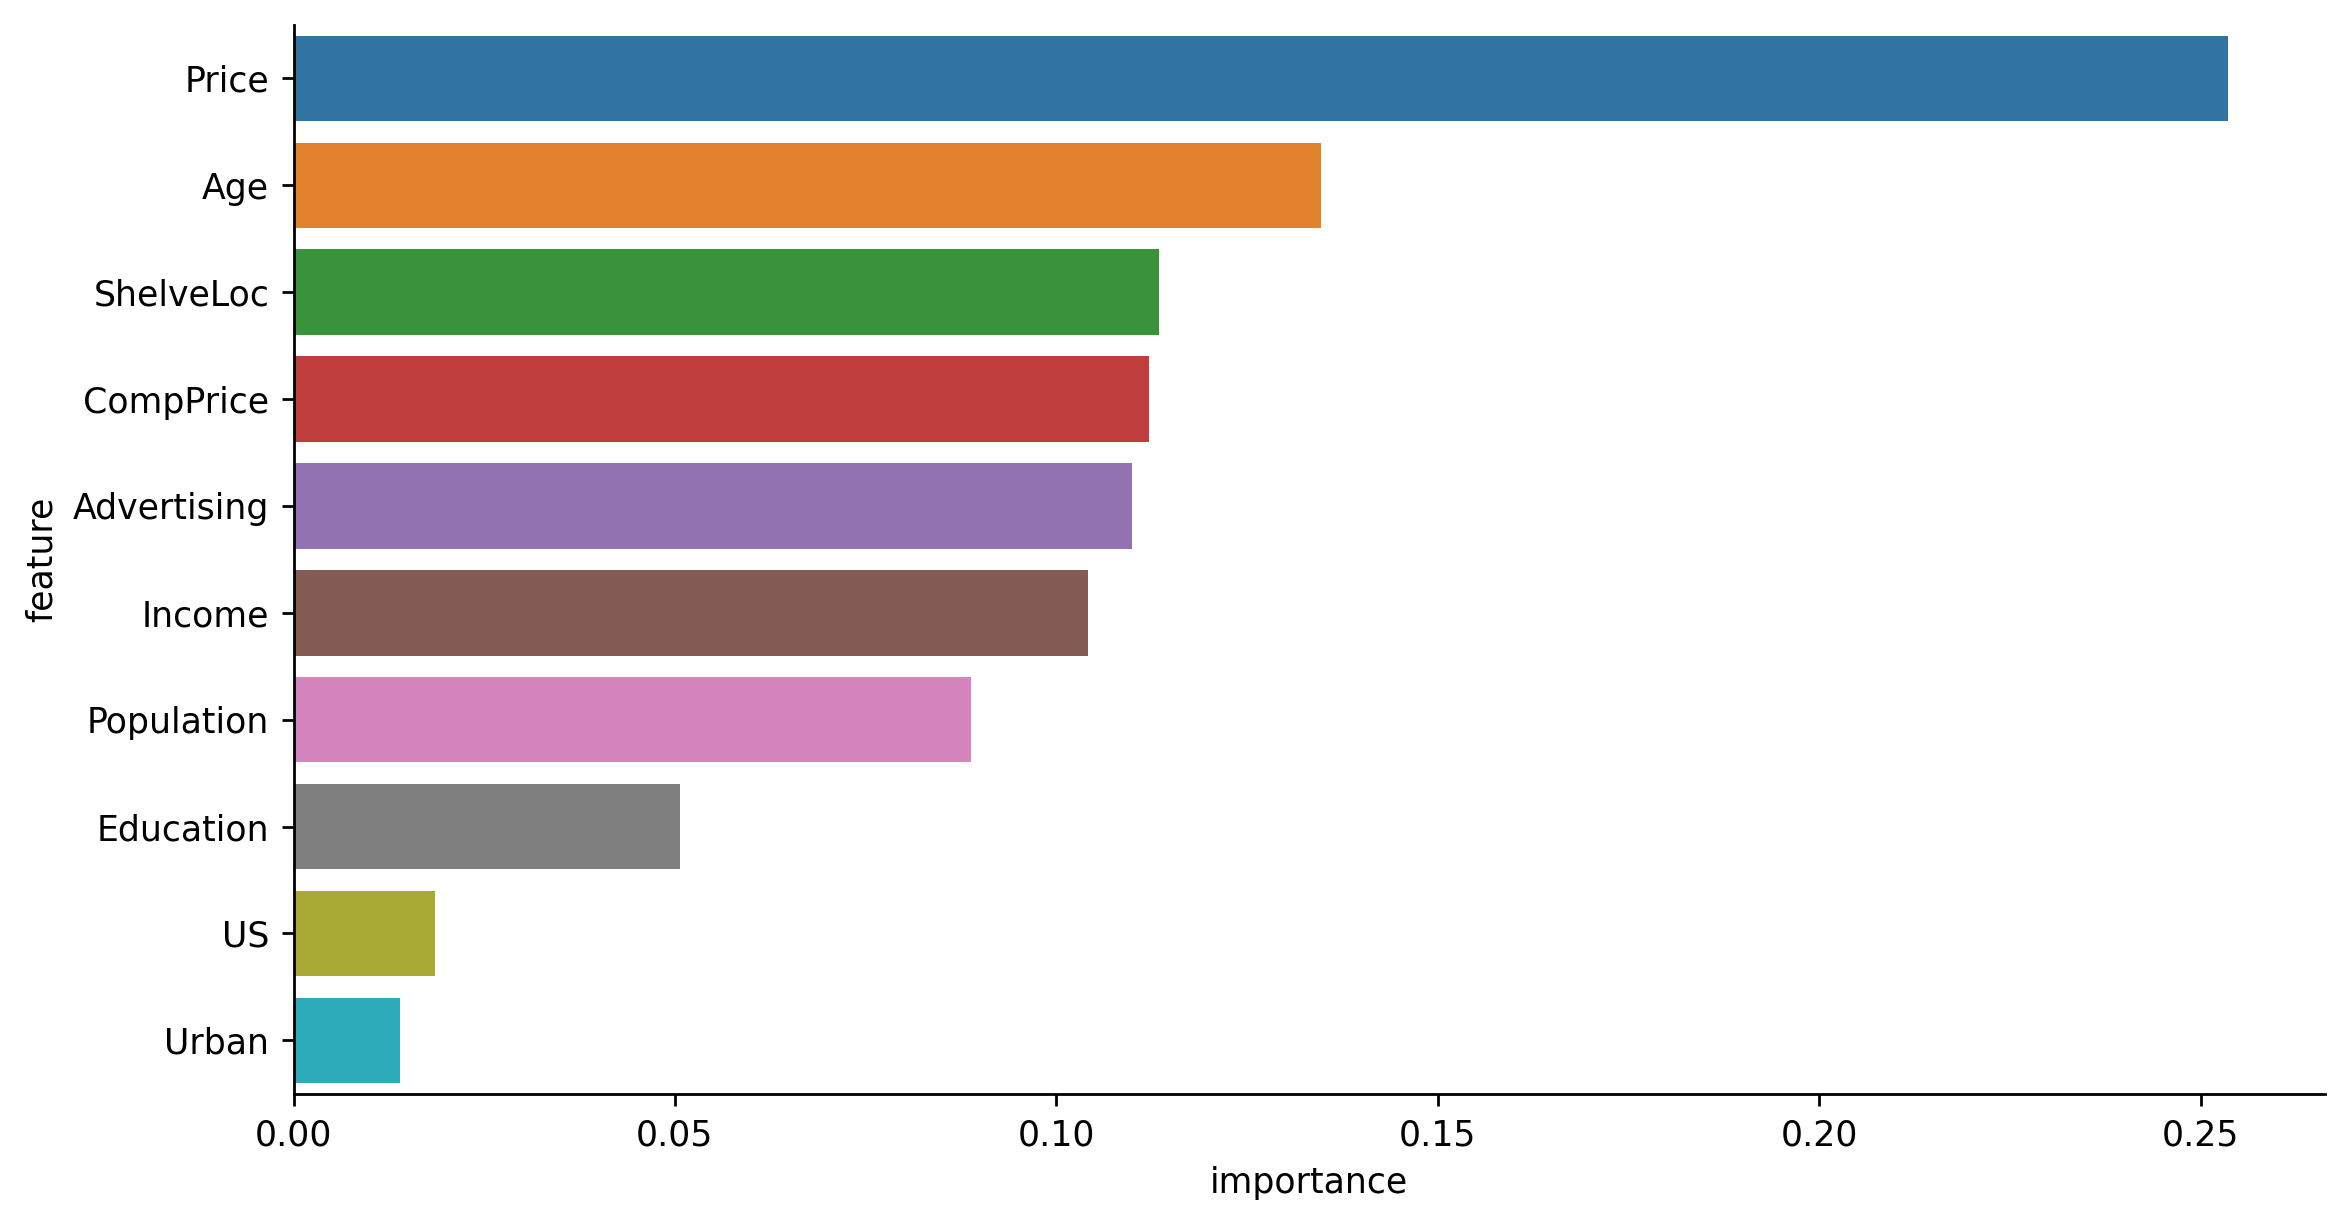

In [33]:
# Let's plot the ranking of the features
plt.rcParams['figure.dpi'] = 250
sns.catplot(data=feature_importance, x='importance', y='feature', aspect=1.9, kind="bar")
plt.tight_layout()

# As we seen in above data, the price column is most important feature.